# Objective

The cassave plant is the third largets source of carbohydrates in the world. Unfortunately due to diseases, there has not been a harvest yield increase globaly in 25 years. 

Using machine learning I will build an image classifier to detect whether a cassava plant has a disease and which of the top 4 most common diseases it is. 

While the main priority is to identify whether or not a plant has a disease, it is also very important to identify which disease it is so that the farmers know how to properly handle the situation. For some diseases, the plant can be recovered by simply removing any infected parts before it spreads. With others, the plant needs to be fully removed, dried and burned.

# The Data

The data used for this is about 21,000 images gathered by Uganda's National Crops Resources Research Institute. This data is near for my objective as it is vast, as well as being sourced directly from farmers who took pictures of their crops. The Institute then went through and labeled each image.

The one downside of this dataset was the massive imbalance in its data. Among the 5 classes there was a ratio of 1:2:2:2:13

In another notebook I sorted and prepared the data for the models.


# Imports

In [1]:
import tensorflow as tf

import numpy as np

from tensorflow.keras.utils import image_dataset_from_directory,\
to_categorical, array_to_img, img_to_array, load_img

from keras.utils.vis_utils import plot_model

from tensorflow.keras import datasets

from tensorflow.keras.models import Sequential

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D,\
MaxPooling2D, Dropout, BatchNormalization, Activation

from tensorflow.keras.regularizers import l2

from tensorflow.keras.metrics import Recall, Precision,\
CategoricalAccuracy

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.callbacks import EarlyStopping

from PIL import Image

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os

import matplotlib.pyplot as plt

import seaborn as sns

from tensorflow.math import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator

from tensorflow import concat

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
os.getcwd()

'/content'

In [ ]:
#Offline
#os.chdir('C:\\Users\\musaa\\Documents\\Cassava\\Cassava-Disease-Classification')
#os.getcwd()

## Load Data

Data is stored in TTVS (train, test, and validation split) directory. 21,000 images split amount 5 classes. After a 60, 20, 20 split, the training data was massivley imbalanced with the following quantities

CBB 652; CBSD 1313; CGM 1431; CMD 7894; Healthy 1546

Useing random selection the CMD class was reduced to 5000 images and using data augmentation methods the other classes were increased to 5000 images.

This was done to deal with the datasets inherent class imbalance, which would skew the training and lead to overfitting of the class with a greater quantity of data.

While other meds do exist to deal with the class imbalance, this method was chosen due to it affecting the dataset and not the model, thus making the various models run faster.

In [4]:
# Google Colab was used for its GPU, thus two file paths exist 
# depending on offline or online notebook usage
train_path_colab = "drive/MyDrive/Capstone/TTVS/train"
val_path_colab = "drive/MyDrive/Capstone/TTVS/val"
test_path_colab = "drive/MyDrive/Capstone/TTVS/test"
train_path_offline = "Data/TTVS/train"
val_path_offline = "Data/TTVS/val"
test_path_offline = "Data/TTVS/test"

train_ds = image_dataset_from_directory(
    train_path_colab,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(600, 600),
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

validation_ds = image_dataset_from_directory(
    val_path_colab,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(600, 600),
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test_ds = image_dataset_from_directory(
    test_path_colab,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(600, 600),
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation="bicubic",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 25020 files belonging to 5 classes.
Found 4277 files belonging to 5 classes.
Found 4284 files belonging to 5 classes.


# Convolutional Neural Network (CNN) model

## Base Model

In [5]:
# to fit the data into the model, all values in the data arrays need to 
# be rescaled to be between 0 and 1
rescaling_layer = layers.experimental.preprocessing.Rescaling(
    scale=1. / 255,
    input_shape=(600, 600, 3)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 600, 600, 3)       0         
                                                                 
 flatten (Flatten)           (None, 1080000)           0         
                                                                 
 dense (Dense)               (None, 64)                69120064  
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 69,120,389
Trainable params: 69,120,389
Non-trainable params: 0
_________________________________________________________________


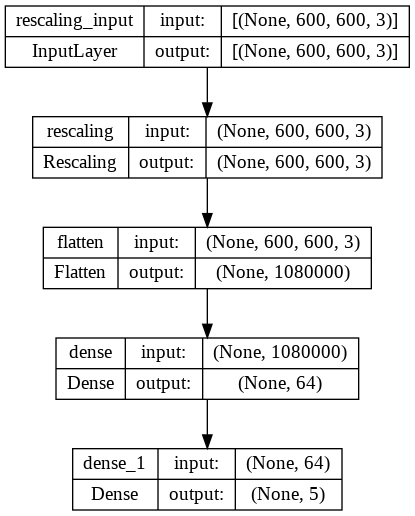

In [6]:
model = Sequential()

model.add(rescaling_layer)

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

The base was model was created simply with the rescaling layer, a layer to flatten the data so that it then fits into the dense layer, a dense layer, and on more dense to get one of 5 classes.

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['CategoricalAccuracy'])

My metric for success chosen was Categorical Accuracy as it gives the most straighforward answer for how often the model predicts the correct class.

In [9]:
history = model.fit(train_ds, validation_data=validation_ds, epochs= 20)

Epoch 1/20
196/196 [==============================] - 750s 4s/step - loss: 29.4968 - categorical_accuracy: 0.2104 - val_loss: 1.6118 - val_categorical_accuracy: 0.1209
Epoch 2/20
196/196 [==============================] - 55s 274ms/step - loss: 1.6103 - categorical_accuracy: 0.1979 - val_loss: 1.6108 - val_categorical_accuracy: 0.1206
Epoch 3/20
196/196 [==============================] - 55s 273ms/step - loss: 1.6102 - categorical_accuracy: 0.1950 - val_loss: 1.6101 - val_categorical_accuracy: 0.1204
Epoch 4/20
196/196 [==============================] - 56s 276ms/step - loss: 1.6097 - categorical_accuracy: 0.1956 - val_loss: 1.6091 - val_categorical_accuracy: 0.1204
Epoch 5/20
196/196 [==============================] - 56s 276ms/step - loss: 1.6095 - categorical_accuracy: 0.1976 - val_loss: 1.6090 - val_categorical_accuracy: 0.1204
Epoch 6/20
196/196 [==============================] - 55s 273ms/step - loss: 1.6095 - categorical_accuracy: 0.1934 - val_loss: 1.6091 - val_categorical_accu

In [13]:
history.params["epochs"]

20

In [44]:
def plot_history(history_v):

  acc = history_v.history['categorical_accuracy']
  val_acc = history_v.history['val_categorical_accuracy']

  loss = history_v.history['loss']
  val_loss = history_v.history['val_loss']

  epochs_range = range(len(history_v.history["loss"]))

  plt.figure(figsize=(15, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Acc')
  plt.plot(epochs_range, val_acc, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Acc')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


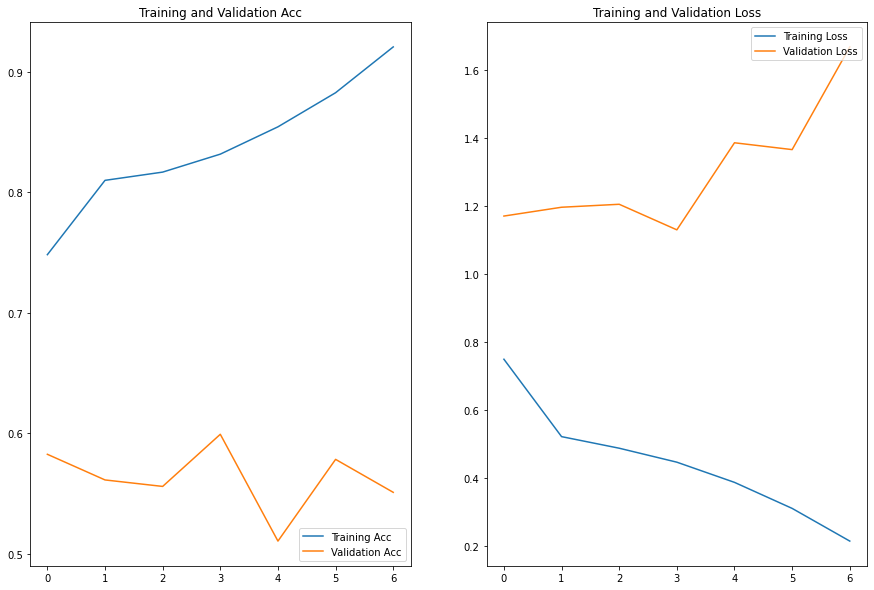

In [37]:
plot_history(history)

## Model 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 600, 600, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 596, 596, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 198, 198, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

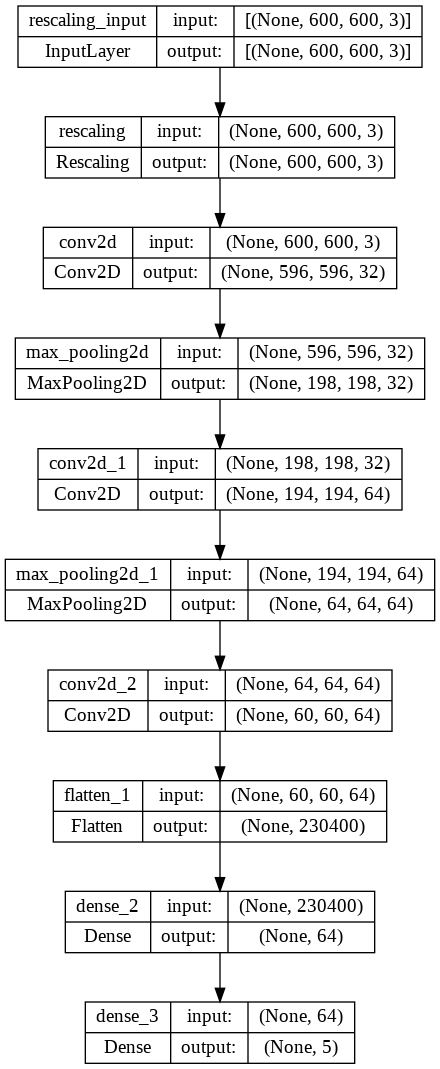

In [22]:
model1 = Sequential()

model1.add(rescaling_layer)

model1.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (600, 600, 3)))

model1.add(MaxPooling2D(pool_size = (3, 3)))

model1.add(Conv2D(64, (5, 5), activation = "relu"))
model1.add(MaxPooling2D(pool_size = (3, 3)))
model1.add(Conv2D(64, (5, 5), activation = "relu"))

model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(5, activation="softmax"))

model1.summary()
plot_model(model1, show_shapes=True, show_layer_names=True)

For the next model, additional layers are added for increased depth and complexity. The biggest change is that the model has been changed from a simple dense neural network it is now a convolutional neural net. This has been done by adding Conv2D layers. Additionaly Maxpooling layers were added to reduce overfitting.

In [23]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=CategoricalAccuracy())

In [25]:
es_callback = EarlyStopping(monitor='val_loss', patience=3)

In [27]:
history = model1.fit(train_ds, validation_data= validation_ds, epochs= 30, callbacks= es_callback)

Epoch 1/30
196/196 [==============================] - 80s 398ms/step - loss: 0.7496 - categorical_accuracy: 0.7480 - val_loss: 1.1702 - val_categorical_accuracy: 0.5824
Epoch 2/30
196/196 [==============================] - 78s 390ms/step - loss: 0.5222 - categorical_accuracy: 0.8097 - val_loss: 1.1961 - val_categorical_accuracy: 0.5611
Epoch 3/30
196/196 [==============================] - 78s 390ms/step - loss: 0.4881 - categorical_accuracy: 0.8165 - val_loss: 1.2048 - val_categorical_accuracy: 0.5558
Epoch 4/30
196/196 [==============================] - 78s 390ms/step - loss: 0.4471 - categorical_accuracy: 0.8315 - val_loss: 1.1297 - val_categorical_accuracy: 0.5990
Epoch 5/30
196/196 [==============================] - 78s 391ms/step - loss: 0.3878 - categorical_accuracy: 0.8541 - val_loss: 1.3855 - val_categorical_accuracy: 0.5104
Epoch 6/30
196/196 [==============================] - 78s 389ms/step - loss: 0.3113 - categorical_accuracy: 0.8824 - val_loss: 1.3654 - val_categorical_acc

An early stop was added to stop the training of the model should the validation accuracy consistently drop after 3 epochs

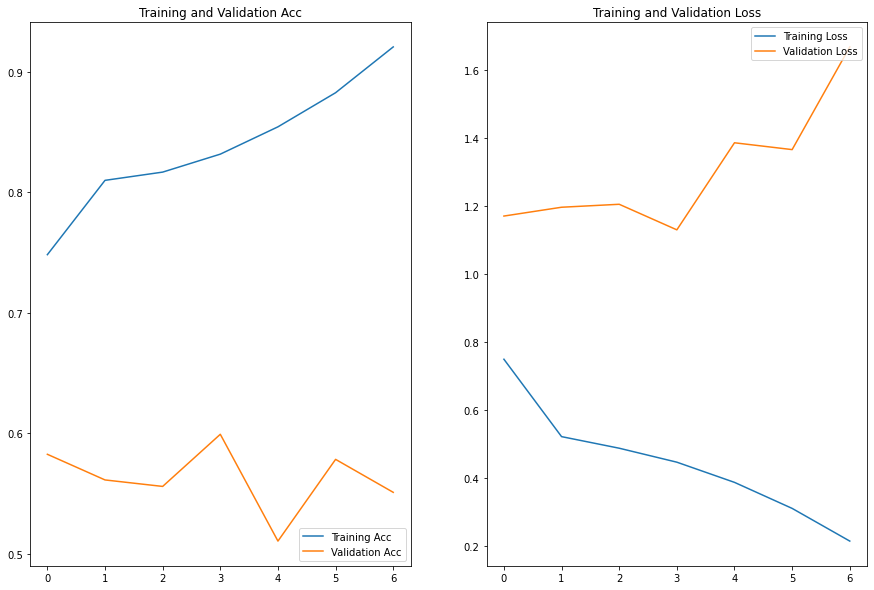

In [38]:
plot_history(history)

## Model 2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 600, 600, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 596, 596, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 198, 198, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 194, 194, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)       

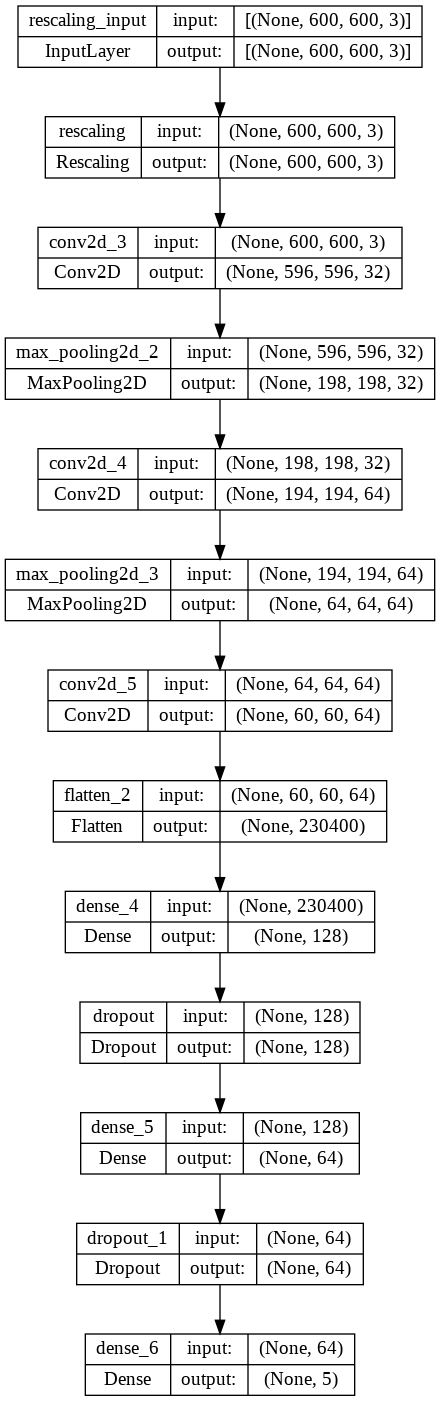

In [39]:
model2 = Sequential()

model2.add(rescaling_layer)

model2.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (600, 600, 3), kernel_regularizer = l2(5e-4) ))

model2.add(MaxPooling2D(pool_size = (3, 3)))

model2.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(5e-4)))
model2.add(MaxPooling2D(pool_size = (3, 3)))
model2.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(5e-4)))

model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.2))

model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation="softmax"))

model2.summary()
plot_model(model2, show_shapes=True, show_layer_names=True)

For this next model, an additional layer types was added to further reduce overfitting, and thus increase accuracy. The layer added was dropout. Additionaly, L2 regularization was added to the conv2D, for the same reason.

In [40]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=CategoricalAccuracy())

In [41]:
history2 = model2.fit(train_ds, validation_data= validation_ds, epochs= 40, callbacks = [es_callback])

Epoch 1/40
196/196 [==============================] - 80s 394ms/step - loss: 1.1839 - categorical_accuracy: 0.5546 - val_loss: 1.4712 - val_categorical_accuracy: 0.5090
Epoch 2/40
196/196 [==============================] - 78s 391ms/step - loss: 0.7934 - categorical_accuracy: 0.7228 - val_loss: 1.3794 - val_categorical_accuracy: 0.5558
Epoch 3/40
196/196 [==============================] - 78s 390ms/step - loss: 0.7156 - categorical_accuracy: 0.7568 - val_loss: 1.4520 - val_categorical_accuracy: 0.5427
Epoch 4/40
196/196 [==============================] - 78s 390ms/step - loss: 0.6894 - categorical_accuracy: 0.7657 - val_loss: 1.3225 - val_categorical_accuracy: 0.5911
Epoch 5/40
196/196 [==============================] - 78s 392ms/step - loss: 0.6342 - categorical_accuracy: 0.7817 - val_loss: 1.4559 - val_categorical_accuracy: 0.5534
Epoch 6/40
196/196 [==============================] - 78s 390ms/step - loss: 0.6029 - categorical_accuracy: 0.7914 - val_loss: 1.2374 - val_categorical_acc

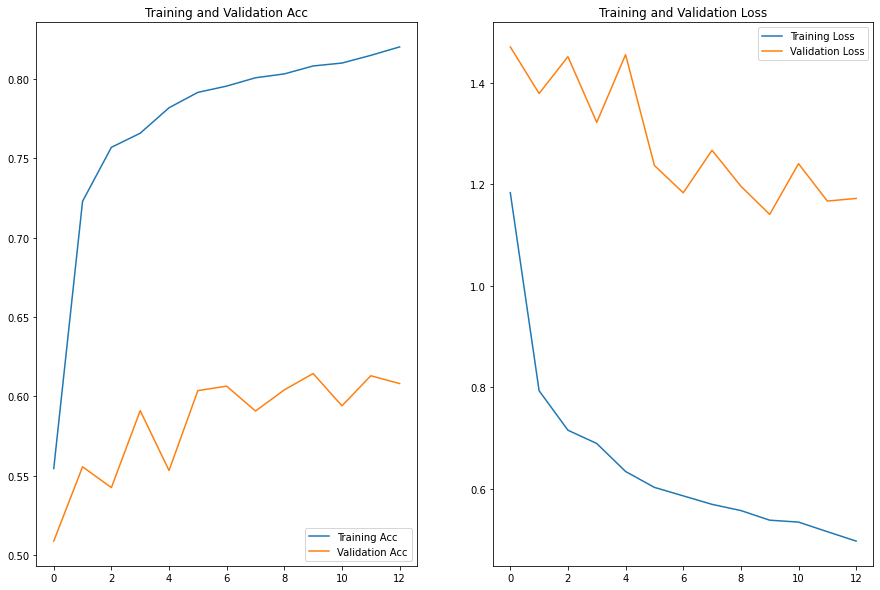

In [45]:
plot_history(history2)

## Model 3

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 600, 600, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 596, 596, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 198, 198, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 194, 194, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)       

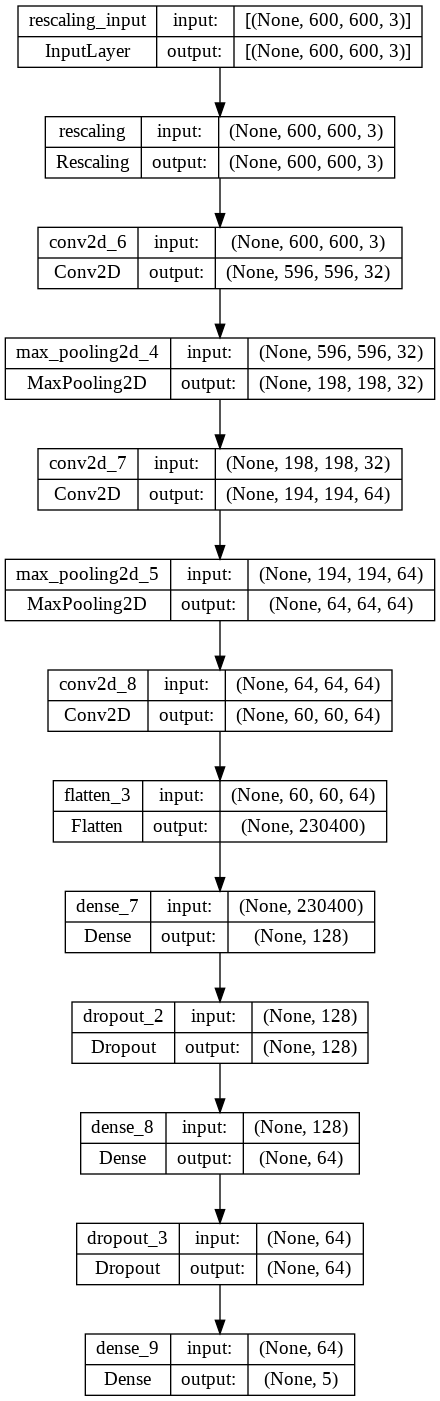

In [46]:
model3 = Sequential()

model3.add(rescaling_layer)

model3.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",
input_shape = (600, 600, 3), kernel_regularizer = l2(.01) ))

model3.add(MaxPooling2D(pool_size = (3, 3)))

model3.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))
model3.add(MaxPooling2D(pool_size = (3, 3)))
model3.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))

model3.add(Flatten())
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(64, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(5, activation="softmax"))

model3.summary()
plot_model(model3, show_shapes=True, show_layer_names=True)

In [47]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=CategoricalAccuracy())

The changes for the third model were simply making the model more layers. This was done in hopes of gaining even more accurate results.

In [48]:
es_callback = EarlyStopping(monitor='val_loss', patience=3)

In [49]:
history3 = model3.fit(train_ds, validation_data= validation_ds, epochs= 100, callbacks = [es_callback])

Epoch 1/100
196/196 [==============================] - 80s 394ms/step - loss: 1.4140 - categorical_accuracy: 0.6245 - val_loss: 1.4768 - val_categorical_accuracy: 0.5735
Epoch 2/100
196/196 [==============================] - 78s 391ms/step - loss: 0.7872 - categorical_accuracy: 0.7972 - val_loss: 1.3222 - val_categorical_accuracy: 0.6032
Epoch 3/100
196/196 [==============================] - 78s 391ms/step - loss: 0.6900 - categorical_accuracy: 0.8020 - val_loss: 1.3049 - val_categorical_accuracy: 0.5887
Epoch 4/100
196/196 [==============================] - 78s 391ms/step - loss: 0.6256 - categorical_accuracy: 0.8108 - val_loss: 1.3188 - val_categorical_accuracy: 0.5857
Epoch 5/100
196/196 [==============================] - 79s 392ms/step - loss: 0.5974 - categorical_accuracy: 0.8093 - val_loss: 1.1197 - val_categorical_accuracy: 0.6236
Epoch 6/100
196/196 [==============================] - 79s 392ms/step - loss: 0.5562 - categorical_accuracy: 0.8178 - val_loss: 1.1817 - val_categoric

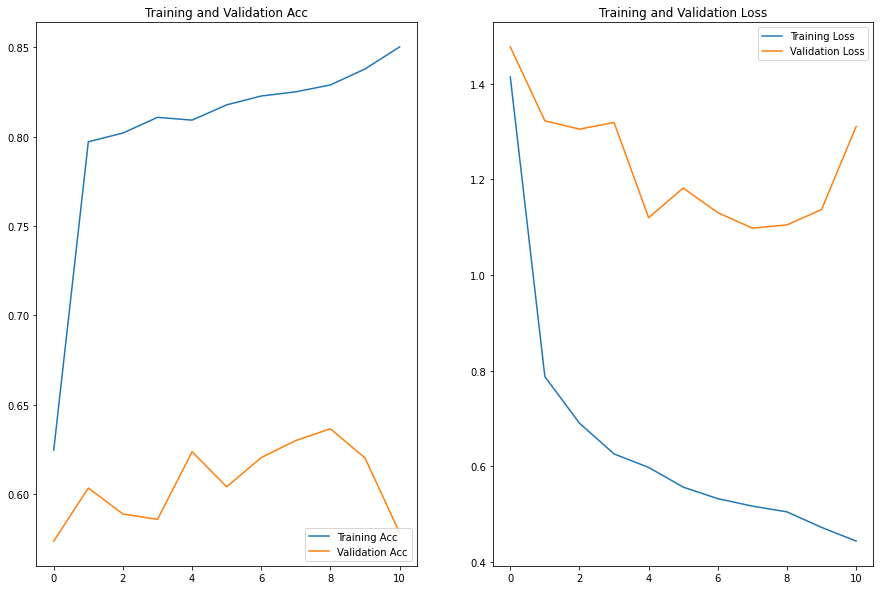

In [50]:
plot_history(history3)

In [51]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model3.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

2/2 [==============================] - 0s 291ms/step


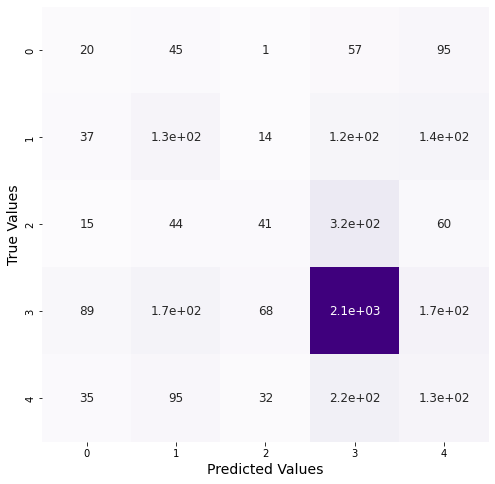

In [52]:
cm = confusion_matrix(labels, predictions)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [ ]:
test_ds

## Model 4

In [53]:
rescaling_layer = layers.experimental.preprocessing.Rescaling(
    scale=1. / 255, input_shape=(600, 600, 3))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 596, 596, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 198, 198, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 194, 194, 64)      51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)       

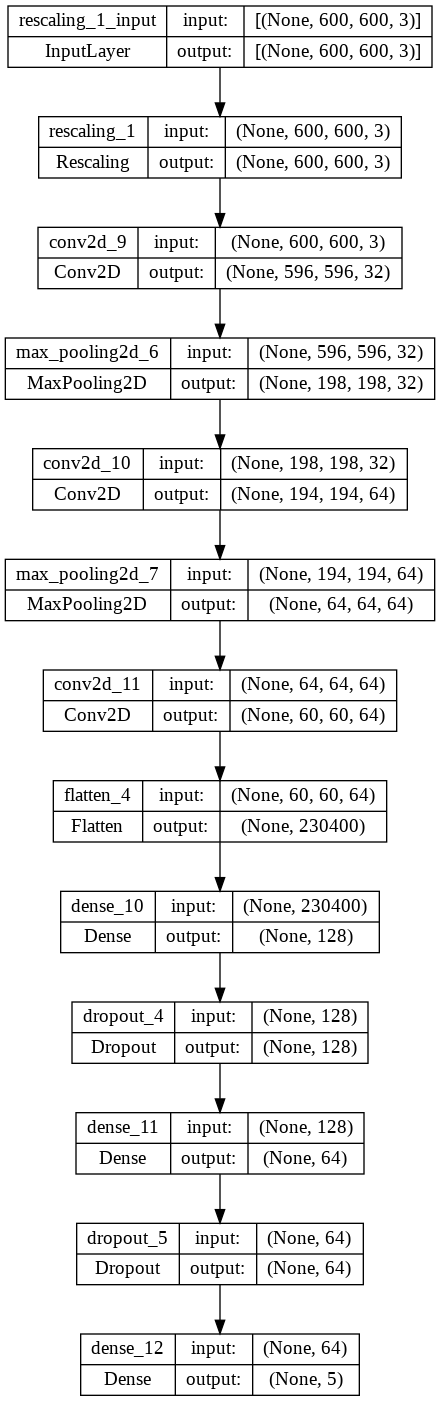

In [54]:
model4 = Sequential()

model4.add(rescaling_layer)

model4.add(Conv2D(
filters= 32, kernel_size = (5, 5), activation = "relu",kernel_regularizer = l2(.01), input_shape = (600, 600, 3) ))

model4.add(MaxPooling2D(pool_size = (3, 3)))

model4.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))
model4.add(MaxPooling2D(pool_size = (3, 3)))
model4.add(Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01)))

model4.add(Flatten())
model4.add(Dense(128, activation="relu"))
model4.add(Dropout(0.2))

model4.add(Dense(64, activation="relu"))
model4.add(Dropout(0.2))

model4.add(Dense(5, activation="softmax"))

model4.summary()
plot_model(model4, show_shapes=True, show_layer_names=True)

In [55]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=[CategoricalAccuracy(), Recall()])

In [61]:
es_callback = EarlyStopping(monitor='val_loss', patience=10)

In [62]:
history4 = model4.fit(train_ds, validation_data= validation_ds, epochs= 100, callbacks = [es_callback])

Epoch 1/100
196/196 [==============================] - 78s 390ms/step - loss: 0.3678 - categorical_accuracy: 0.8789 - recall: 0.8361 - val_loss: 1.4673 - val_categorical_accuracy: 0.5796 - val_recall: 0.5125
Epoch 2/100
196/196 [==============================] - 78s 391ms/step - loss: 0.3147 - categorical_accuracy: 0.8998 - recall: 0.8657 - val_loss: 1.7888 - val_categorical_accuracy: 0.5001 - val_recall: 0.4307
Epoch 3/100
196/196 [==============================] - 78s 391ms/step - loss: 0.2971 - categorical_accuracy: 0.9082 - recall: 0.8790 - val_loss: 1.7580 - val_categorical_accuracy: 0.5305 - val_recall: 0.4753
Epoch 4/100
196/196 [==============================] - 78s 391ms/step - loss: 0.2597 - categorical_accuracy: 0.9238 - recall: 0.8999 - val_loss: 2.0739 - val_categorical_accuracy: 0.5668 - val_recall: 0.5406
Epoch 5/100
196/196 [==============================] - 78s 390ms/step - loss: 0.2300 - categorical_accuracy: 0.9354 - recall: 0.9174 - val_loss: 1.9544 - val_categorica

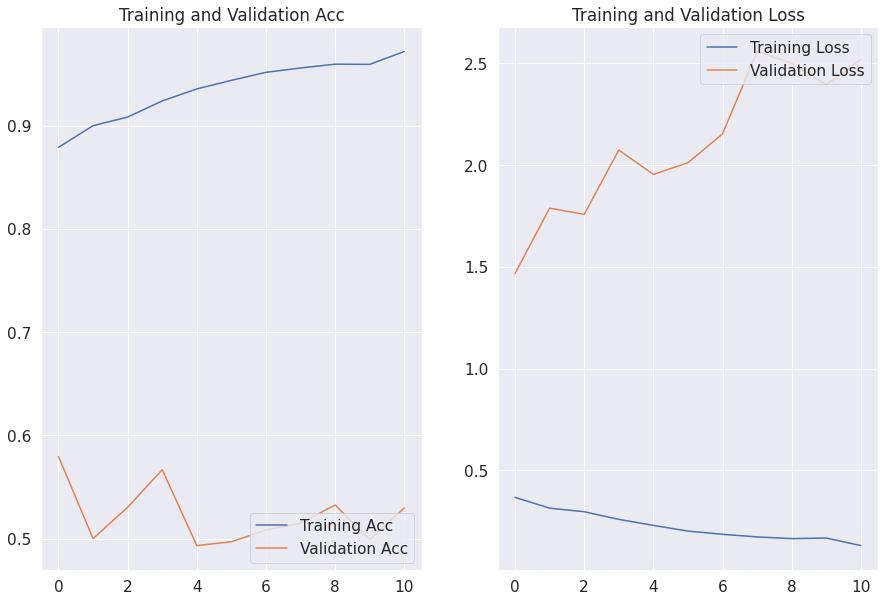

In [63]:
plot_history(history4)

In [64]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
    predictions = np.concatenate([predictions, np.argmax(model4.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

2/2 [==============================] - 0s 41ms/step


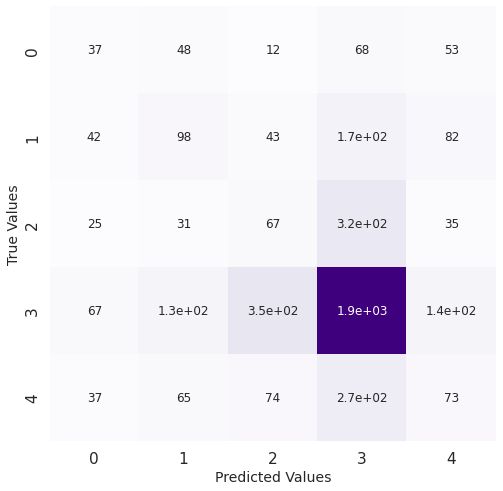

In [65]:
cm = confusion_matrix(labels, predictions)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

# Resnet50

In [66]:
resmodel = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(600, 600, 3),
    pooling=None,
    classes=None)

94765736/94765736 [==============================] - 1s 0us/step


In [67]:
resmodel.trainable = False

In [84]:
inputs = tf.keras.Input(shape=(600, 600, 3))

x = resmodel(inputs, training=False)

x = Conv2D(64, (5, 5), activation = "relu", kernel_regularizer = l2(.01))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(128)(x)

x = tf.keras.layers.Dense(64)(x)

x = tf.keras.layers.Dropout(.02)(x)

outputs = tf.keras.layers.Dense(5)(x)

model = tf.keras.Model(inputs, outputs)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 19, 19, 2048)      23587712  
                                                                 
 conv2d_13 (Conv2D)          (None, 15, 15, 64)        3276864   
                                                                 
 global_average_pooling2d_7   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                           

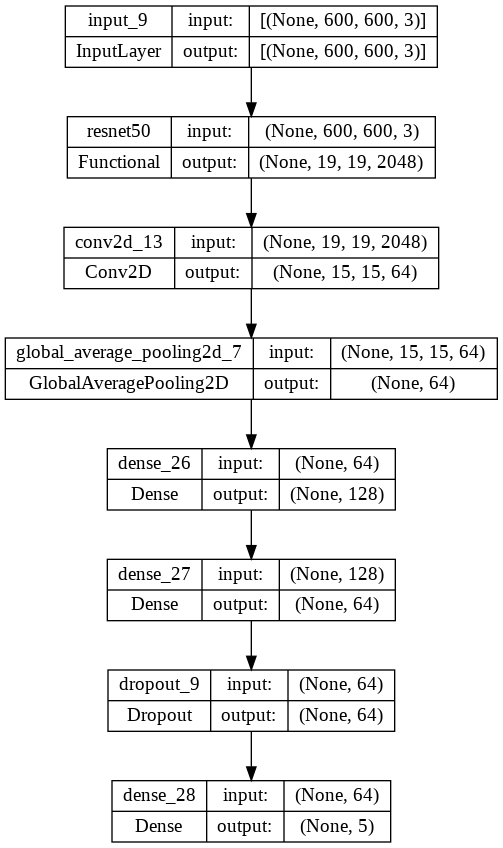

In [85]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [86]:
es_callback = EarlyStopping(monitor='val_loss', patience=3)

In [87]:
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=['CategoricalAccuracy'])


model.fit(train_ds, epochs=100, callbacks=es_callback, validation_data=validation_ds)


Epoch 1/100
196/196 [==============================] - 131s 644ms/step - loss: 8.0586 - categorical_accuracy: 0.1968 - val_loss: 10.9524 - val_categorical_accuracy: 0.1115
Epoch 2/100
196/196 [==============================] - 127s 638ms/step - loss: 6.6040 - categorical_accuracy: 0.1998 - val_loss: 10.7863 - val_categorical_accuracy: 0.1115
Epoch 3/100
196/196 [==============================] - 127s 638ms/step - loss: 6.4944 - categorical_accuracy: 0.1983 - val_loss: 10.3192 - val_categorical_accuracy: 0.1115
Epoch 4/100
196/196 [==============================] - 126s 637ms/step - loss: 6.5284 - categorical_accuracy: 0.1890 - val_loss: 8.5690 - val_categorical_accuracy: 0.1115
Epoch 5/100
196/196 [==============================] - 127s 638ms/step - loss: 6.4252 - categorical_accuracy: 0.1667 - val_loss: 5.9369 - val_categorical_accuracy: 0.1120
Epoch 6/100
196/196 [==============================] - 127s 639ms/step - loss: 6.2778 - categorical_accuracy: 0.1045 - val_loss: 4.9998 - val_

## Ignore

In [ ]:
rescaling_layer = layers.experimental.preprocessing.Rescaling(
    scale=1./255, input_shape=(600, 600, 3))

layer1 = Conv2D(filters=32, kernel_size=(3,3), input_shape=(600, 600, 3), 
                activation="relu", kernel_regularizer=l2(.001))

layerpool = MaxPooling2D(pool_size=(3, 3))

layerconv = Conv2D(64, (5, 5), activation="relu", kernel_regularizer=l2(.01))

layerflat = Flatten()

layerdense1 = Dense(128, activation="relu")

layerdense2 = Dense(64, activation="relu")

layerdropout = Dropout(0.2)

finallayer = Dense(5, activation="softmax")

In [ ]:
model5 = Sequential([rescaling_layer, layer1, layerpool, layerconv,
                    layerpool, layerflat, layerdense1, layerdense2,
                    layerdropout, finallayer])